In [44]:
import wandb
wandb.login()

True

In [45]:
%load_ext autoreload
%autoreload 2
from data import load_mrs
from config import custom_VAE_config, custom_beta_VAE_config, basic_VAE_config
from models import MRS_decoder, MRS_encoder
from training import get_model, get_callback, get_pipeline, train
from visualization import show_generated_data, sample_model
from random import randint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
train_dataset, eval_dataset, ppm = load_mrs()

In [40]:
%%capture
config, model_config = custom_VAE_config()

wandb_callback = get_callback(config, model_config)

encoder = MRS_encoder(model_config)
decoder = MRS_decoder(model_config)
model = get_model(model_config, encoder, decoder)

pipeline = get_pipeline(model, config)

trained_model = train('custom_VAE', pipeline, train_dataset, eval_dataset, wandb_callback)


Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created custom_VAE/VAE_training_2023-05-17_02-22-57. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 250
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.91, 0.99)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0.05
)
Scheduler: None

Successfully launched training !

--------------------------------------------------------------------------
Train loss: 307.5293
Eval loss: 36.3665
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Train loss: 1

(2048,)
(2048,)
(2048,)
MSE: 0.0027654723234473502


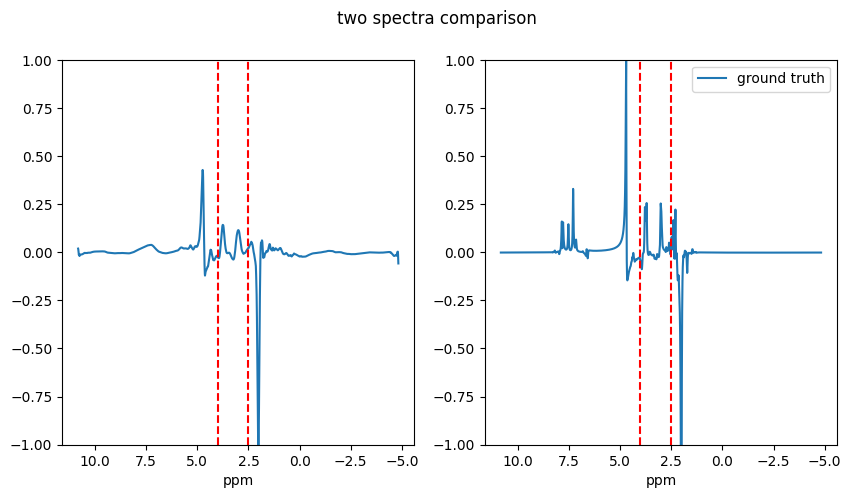

In [41]:
gen_data = sample_model(trained_model)
gen_data = gen_data.cpu()
select = randint(0,39)
show_generated_data(gen_data, eval_dataset[select], ppm)

In [42]:
%%capture
config, model_config = custom_beta_VAE_config()

wandb_callback = get_callback(config, model_config)
model = get_model(model_config)

pipeline = get_pipeline(model, config)

trained_model = train('custom_beta_VAE', pipeline, train_dataset, eval_dataset, wandb_callback)


Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created custom_beta_VAE/VAE_training_2023-05-17_02-23-43. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 250
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.91, 0.99)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0.05
)
Scheduler: None

Successfully launched training !

--------------------------------------------------------------------------
Train loss: 175.7823
Eval loss: 38.367
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Train los

(2048,)
(2048,)
(2048,)
MSE: 0.0012756583908119087


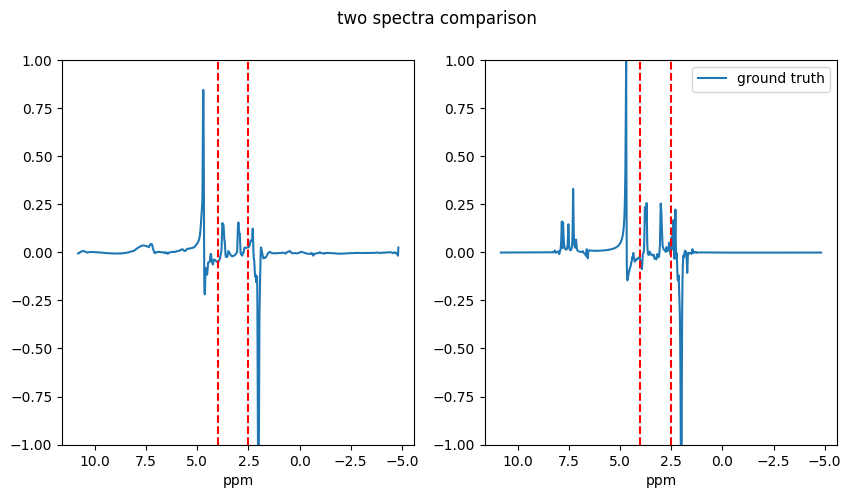

In [43]:
gen_data = sample_model(trained_model)
gen_data = gen_data.cpu()
show_generated_data(gen_data, eval_dataset[select], ppm)

In [47]:
%%capture
config, model_config = basic_VAE_config()

wandb_callback = get_callback(config, model_config)

encoder = MRS_encoder(model_config)
decoder = MRS_decoder(model_config)
model = get_model(model_config, encoder, decoder)

pipeline = get_pipeline(model, config)

trained_model = train('basic_MRS_VAE', pipeline, train_dataset, eval_dataset, wandb_callback)

Preprocessing train data...
Checking train dataset...
Preprocessing eval data...

Checking eval dataset...
Using Base Trainer

Model passed sanity check !
Ready for training.

Created basic_MRS_VAE/VAE_training_2023-05-17_02-27-08. 
Training config, checkpoints and final model will be saved here.

Training params:
 - max_epochs: 250
 - per_device_train_batch_size: 64
 - per_device_eval_batch_size: 64
 - checkpoint saving every: None
Optimizer: AdamW (
Parameter Group 0
    amsgrad: False
    betas: (0.91, 0.99)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0002
    maximize: False
    weight_decay: 0.05
)
Scheduler: None

Successfully launched training !

--------------------------------------------------------------------------
Train loss: 433.5704
Eval loss: 34.5329
--------------------------------------------------------------------------
--------------------------------------------------------------------------
Train loss

(2048,)
(2048,)
(2048,)
MSE: 0.0021452478791456247


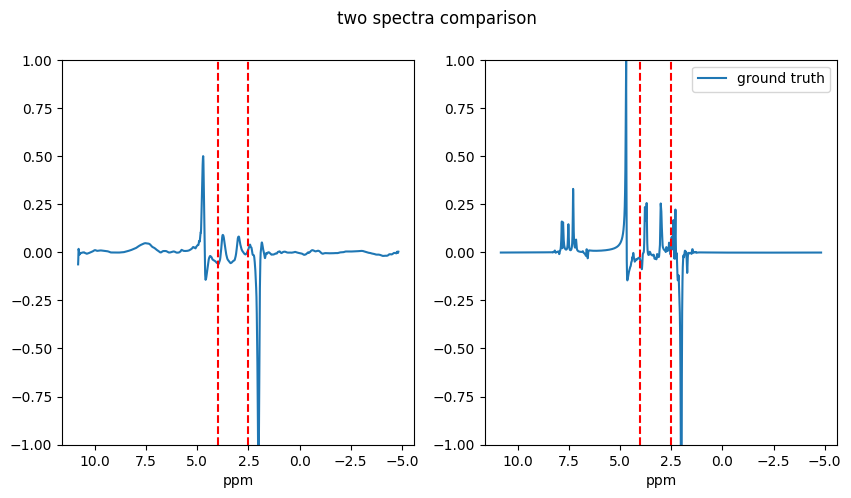

In [48]:
gen_data = sample_model(trained_model)
gen_data = gen_data.cpu()
show_generated_data(gen_data, eval_dataset[select], ppm)